In [2]:
# import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


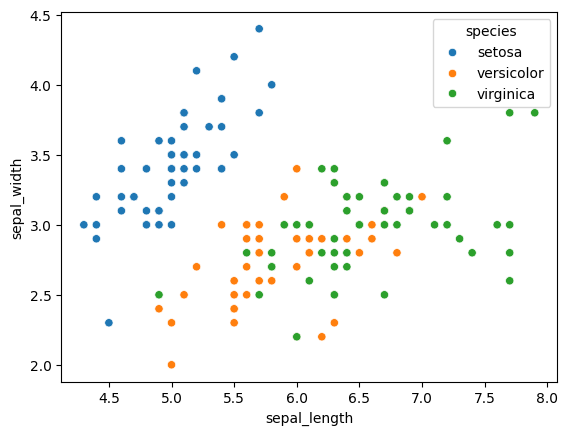

In [4]:
# plot the data as scatter plot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [5]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

le = LabelEncoder()
y = le.fit_transform(y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Bagging Algorithms

In [6]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# print the matrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.9333333333333333
Precision Score:  0.9333333333333333
Recall Score:  0.9333333333333333
F1 Score:  0.9333333333333333
CPU times: total: 31.2 ms
Wall time: 15.4 ms


In [7]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# print the matrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.9666666666666667
Precision Score:  0.9666666666666667
Recall Score:  0.9666666666666667
F1 Score:  0.9666666666666667
CPU times: total: 188 ms
Wall time: 202 ms


### Boosting Algorithms

In [8]:
%%time
# train boosting model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# print the matrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.9666666666666667
Precision Score:  0.9666666666666667
Recall Score:  0.9666666666666667
F1 Score:  0.9666666666666667
CPU times: total: 203 ms
Wall time: 83 ms


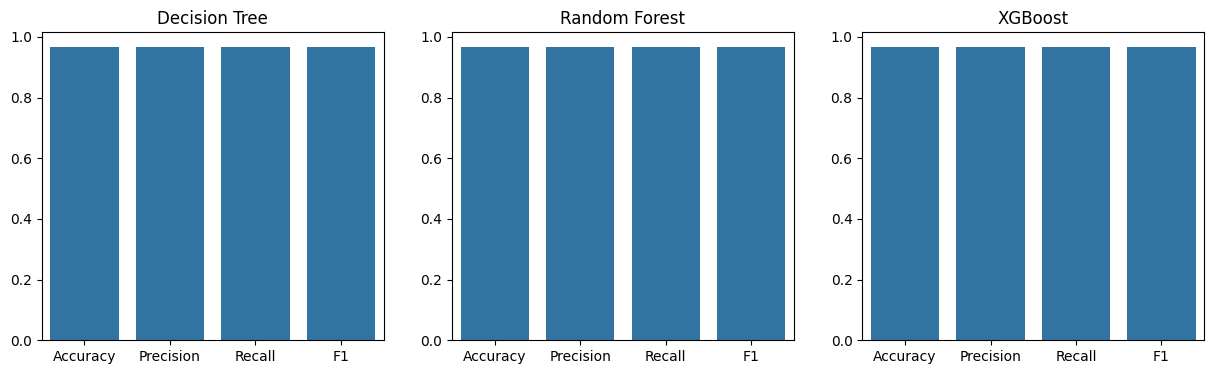

In [9]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 3, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 3, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
plt.show()

### All are the same because our dataset is small


### Now let's try with a bigger dataset (Diamond)

In [19]:
%%time
df = sns.load_dataset('diamonds')
df.head()

CPU times: total: 78.1 ms
Wall time: 81.9 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.shape

(53940, 10)

In [24]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encoding the data
X['color'] = LabelEncoder().fit_transform(X['color'])
X['clarity'] = LabelEncoder().fit_transform(X['clarity'])

y = LabelEncoder().fit_transform(y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Bagging Algorithms

In [29]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# print the matrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.7133852428624398
Precision Score:  0.7133852428624398
Recall Score:  0.7133852428624398
F1 Score:  0.7133852428624398
CPU times: total: 453 ms
Wall time: 449 ms


In [26]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# print the matrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.7867074527252503
Precision Score:  0.7867074527252503
Recall Score:  0.7867074527252503
F1 Score:  0.7867074527252503
CPU times: total: 10.2 s
Wall time: 11.4 s


### Boosting Algorithms

In [27]:
%%time
# train boosting model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# print the matrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.8018168335187245
Precision Score:  0.8018168335187245
Recall Score:  0.8018168335187245
F1 Score:  0.8018168335187245
CPU times: total: 5.34 s
Wall time: 1.83 s


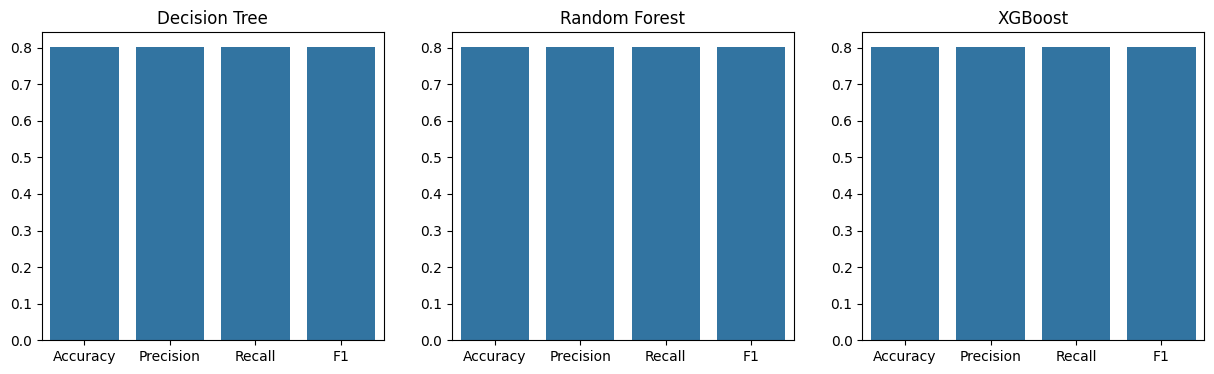

In [28]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 3, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 3, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
plt.show()